In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec

In [2]:
df_iron = pd.read_csv('../Dissertation_projects/Data/IRON/Iron.csv', sep=',', index_col=0)

#make all the spots labeled NA a nan value
df_iron = df_iron.replace('NA', np.nan)
df_iron = df_iron.replace('NA ', np.nan)

#make all BDL a 0 
df_iron.loc[df_iron['FeT_uM'] == 'BLD', 'FeT_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] == 'BLD', 'Fe2_uM'] = 0

# convert columns to numeric data type
df_iron['FeT_uM'] = pd.to_numeric(df_iron['FeT_uM'], errors='coerce')
df_iron['Fe2_uM'] = pd.to_numeric(df_iron['Fe2_uM'], errors='coerce')

df_iron['FeT_uM'] = df_iron['FeT_uM'].where(pd.notna(df_iron['FeT_uM']), other=np.nan)
df_iron['Fe2_uM'] = df_iron['Fe2_uM'].where(pd.notna(df_iron['Fe2_uM']), other=np.nan)

#make all negative a 0 
df_iron.loc[df_iron['FeT_uM'] < 0, 'FeT_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] < 0, 'Fe2_uM'] = 0

#calculate Fe +3 
df_iron['Fe3_uM'] = df_iron['FeT_uM'] - df_iron['Fe2_uM']
df_iron.loc[df_iron['Fe3_uM'] < 0, 'Fe3_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] > df_iron['FeT_uM'], 'Fe3_uM'] = 0
df_iron['Fe3_uM'] = pd.to_numeric(df_iron['Fe3_uM'], errors='coerce')
df_iron['Fe3_uM'] = df_iron['Fe3_uM'].where(pd.notna(df_iron['Fe3_uM']), other=np.nan)

#time feild 
df_iron['Fe2_Time'] = pd.to_numeric(df_iron['Fe2_Time'], errors='coerce')
df_iron['Fe2_Time'] = df_iron['Fe2_Time'].where(pd.notna(df_iron['Fe2_Time']), other=np.nan)

#time feild 
df_iron['FeT_Time'] = pd.to_numeric(df_iron['FeT_Time'], errors='coerce')
df_iron['FeT_Time'] = df_iron['FeT_Time'].where(pd.notna(df_iron['FeT_Time']), other=np.nan)

# convert columns to numeric data type
df_iron['FeT_Depth'] = pd.to_numeric(df_iron['Fe2_Depth'], errors='coerce')
df_iron['Fe2_Depth'] = pd.to_numeric(df_iron['Fe2_Depth'], errors='coerce')

df_iron['FeT_uM'] = df_iron['FeT_uM'].replace(0, np.nan)
df_iron['Fe2_uM'] = df_iron['Fe2_uM'].replace(0, np.nan)
df_iron['Fe3_uM'] = df_iron['Fe3_uM'].replace(0, np.nan)

df_iron['code'] = df_iron['Location'] + '_' + df_iron['Campaign']

In [3]:
df_doc = pd.read_csv('../Dissertation_projects/Data/TOC/TOC_GOM.csv', sep=',', index_col=0)

#make all BDL a 0 
df_doc.loc[df_doc['NPOC_uM'] == 'BLD', 'NPOC_uM'] = 0
df_doc.loc[df_doc['TN_uM'] == 'BLD', 'TN_uM'] = 0

df_doc.loc[df_doc['NPOC_uM'] < 0, 'NPOC_uM'] = 0
df_doc.loc[df_doc['TN_uM'] < 0, 'TN_uM'] = 0

#fix date time 
df_doc['date_time'] = pd.to_datetime(df_doc['Date'])
df_doc['Date'] = df_doc['date_time'].dt.date

df_doc['NPOC_uM'] = pd.to_numeric(df_doc['NPOC_uM'], errors='coerce')
df_doc['NPOC_uM'] = df_doc['NPOC_uM'].where(pd.notna(df_doc['NPOC_uM']), other=np.nan)

df_doc['TN_uM'] = pd.to_numeric(df_doc['TN_uM'], errors='coerce')
df_doc['TN_uM'] = df_doc['TN_uM'].where(pd.notna(df_doc['TN_uM']), other=np.nan)

df_doc['Time'] = pd.to_numeric(df_doc['Time'], errors='coerce')
df_doc['Time'] = df_doc['Time'].where(pd.notna(df_doc['Time']), other=np.nan)

df_doc['NPOC_uM'] = df_doc['NPOC_uM'].replace(0, np.nan)
df_doc['TN_uM'] = df_doc['TN_uM'].replace(0, np.nan)

df_doc['code'] = df_doc['Location'] + '_' + df_doc['Campaign']

In [4]:
df_meta = pd.read_csv('../Dissertation_projects/Data/meta_data.csv', sep=',', index_col=0)

#fix date time 
df_meta['date_time'] = pd.to_datetime(df_meta['Date'])
df_meta['Date'] = df_meta['date_time'].dt.date

df_meta['code'] = df_meta['Station'] + '_' + df_meta['Trip']

In [15]:
df_c = pd.read_csv('../Dissertation_projects/Data/CDOM/Outputs.csv', sep=',', index_col=0)

df_c['Sample_idx'] = df_c.index.astype(object)
df_meta['Sample_idx'] = df_meta.index.astype(object)

df_c.index = df_c['file_id']

df_cdom = df_c.merge(df_meta, on="Sample_idx", how="left")

df_cdom.index = df_cdom['Sample_idx']
df_cdom['Sample'] = df_cdom.index
df_cdom.index = df_cdom['Sample']
df_cdom = df_cdom.drop('Sample_idx', axis = 1)
df_meta = df_meta.drop('Sample_idx', axis = 1)

df_cdom['Type']

Sample
212841    LANDSYR
212842    LANDSYR
212843    LANDSYR
212844    LANDSYR
212845    LANDSYR
           ...   
225339       NISK
225339       NISK
225340       NISK
225340       NISK
225340       NISK
Name: Type, Length: 6373, dtype: object

In [16]:
df_por = pd.read_csv('../Dissertation_projects/Data/Porosity/Porosity.csv', sep=',', index_col = 0)

df_por['code'] = df_por['Stn'] + '_' + df_por['camp']

In [17]:
df_hights = pd.read_csv('../Dissertation_projects/Data/Hights.csv', sep=',')

df_hights['code'] = df_hights['Stn'] + '_' + df_hights['Camp']
#df_hights.drop("Stn", axis=1, inplace=True)
#df_hights.drop("Camp", axis=1, inplace=True)
df_hights.index = df_hights['code']
df_hights.drop("code", axis=1, inplace=True)

In [18]:
df_spectra_bc = pd.read_csv('../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_BC.csv',sep=',', index_col=0)
df_spectra_pw = pd.read_csv('../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_PW.csv',sep=',', index_col=0)
df_spectra_wc = pd.read_csv('../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_WC.csv',sep=',', index_col=0)
df_spectra_rz = pd.read_csv('../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_RZ.csv',sep=',', index_col=0)

df_spectra_bc.columns = ['a' + col for col in df_spectra_bc.columns]
df_spectra_pw.columns = ['a' + col for col in df_spectra_pw.columns]
df_spectra_wc.columns = ['a' + col for col in df_spectra_wc.columns]
df_spectra_rz.columns = ['a' + col for col in df_spectra_rz.columns]

In [19]:
#get BC data sets 
df_cdom_bc = df_cdom[df_cdom['Type'] == 'LANDSYR']
df_iron_bc = df_iron[df_iron['Type'] == 'BC']
df_doc_bc = df_doc[df_doc['Type'] == 'BC']

#get PW data sets 
df_cdom_pw = df_cdom[df_cdom['Type'] == 'PW']
df_iron_pw = df_iron[df_iron['Type'] == 'PW']
df_doc_pw = df_doc[df_doc['Type'] == 'PW']

#get WC data sets 
df_cdom_wc = df_cdom[df_cdom['Type'] == 'NISK']
df_iron_wc = df_iron[df_iron['Type'] == 'WC']
df_doc_wc = df_doc[df_doc['Type'] == 'WC']

#get RHZ data 
df_cdom_rz = df_cdom[df_cdom['Type'] == 'RHZ']
df_iron_rz = df_iron[df_iron['Type'].isin(['RZ', 'GBRZ'])]
df_doc_rz = df_doc[df_doc['Type'] == 'RZ']

df_cdom['Type']

Sample
212841    LANDSYR
212842    LANDSYR
212843    LANDSYR
212844    LANDSYR
212845    LANDSYR
           ...   
225339       NISK
225339       NISK
225340       NISK
225340       NISK
225340       NISK
Name: Type, Length: 6373, dtype: object

In [20]:
#Put all the BC data together 
#remove repeat rows 
df_cdom_bc_cl = df_cdom_bc.drop(['Date', 'Type', 'Notes', 'date_time', 'code', 'Trip', 'Salinity',
                                 'Station', 'Lat', 'Lon', 'Water_depth', 'Sample_depth',
                                 'Sample_depth_units', 'Wavguide_Path_lengths', 'BC_time',
                                 'BC_Chamber_vol_(L)', 'Waveguide_used', 'Flagged', 'file_id'], axis=1)
df_iron_bc_cl = df_iron_bc.drop(['Treatment', 'Campaign', 'Location', 'Type', 'code'], axis=1)
df_doc_bc_cl = df_doc_bc.drop(['Treatment', 'Campaign', 'Location','Date', 'Type','Depth', 'Notes', 
                               'Time','code','date_time'], axis=1)

df_cdom_bc_cl.index = df_cdom_bc_cl.index.astype(str)
df_iron_bc_cl.index = df_iron_bc_cl.index.astype(str)
df_doc_bc_cl.index = df_doc_bc_cl.index.astype(str)
df_spectra_bc.index = df_spectra_bc.index.astype(str)


#combind DOC and CDOM data 
df_bc = df_spectra_bc.join(df_doc_bc_cl)
df_bc = df_bc.join(df_cdom_bc_cl)

#match up the inxdes for the merge 
df_iron_bc_cl['sample_index'] = df_iron_bc_cl.index.astype(str)
df_bc.index = df_bc.index.astype(str)

#combind the iron data 
df_bc = df_bc.join(df_iron_bc_cl)
df_meta.index = df_meta.index.astype(str)

df_bc = df_meta.merge(df_bc, left_index=True, right_index=True)

#################################################

#Put all the PW data together 
#remove repeat rows 
df_cdom_pw_cl = df_cdom_pw.drop(['Date', 'Type', 'Notes', 'date_time', 'code', 'Trip', 'Salinity',
                                 'Station', 'Lat', 'Lon', 'Water_depth', 'Sample_depth',
                                 'Sample_depth_units', 'Wavguide_Path_lengths', 'BC_time',
                                 'BC_Chamber_vol_(L)', 'Waveguide_used', 'Flagged', 'file_id'], axis=1)
df_iron_pw_cl = df_iron_pw.drop(['Treatment', 'Campaign', 'Location', 'Type', 'code'], axis=1)
df_doc_pw_cl = df_doc_pw.drop(['Treatment','Campaign', 'Location','Date', 'Type','Depth', 'Notes', 
                               'Time','code','date_time'], axis=1)

df_cdom_pw_cl.index = df_cdom_pw_cl.index.astype(str)
df_iron_pw_cl.index = df_iron_pw_cl.index.astype(str)
df_doc_pw_cl.index = df_doc_pw_cl.index.astype(str)
df_spectra_pw.index = df_spectra_pw.index.astype(str)


#combind DOC and CDOM data 
df_pw = df_spectra_pw.join(df_doc_pw_cl)
df_pw = df_pw.join(df_cdom_pw_cl)

#match up the inxdes for the merge 
df_iron_pw_cl['sample_index'] = df_iron_pw_cl.index.astype(str)
df_pw.index = df_pw.index.astype(str)

#combind the iron data 
df_pw = df_pw.join(df_iron_pw_cl)

df_pw = df_meta.merge(df_pw, left_index=True, right_index=True)

###############################################

#Put all the WC data together 
#remove repeat rows 
df_cdom_wc_cl = df_cdom_wc.drop(['Date', 'Type', 'Notes', 'date_time', 'code', 'Trip', 'Salinity',
                                 'Station', 'Lat', 'Lon', 'Water_depth', 'Sample_depth',
                                 'Sample_depth_units', 'Wavguide_Path_lengths', 'BC_time',
                                 'BC_Chamber_vol_(L)', 'Waveguide_used', 'Flagged', 'file_id'], axis=1)
df_iron_wc_cl = df_iron_wc.drop(['Treatment', 'Campaign', 'Location', 'Type', 'code'], axis=1)
df_doc_wc_cl = df_doc_wc.drop(['Treatment', 'Campaign', 'Location','Date', 'Type','Depth', 'Notes', 
                               'Time','code','date_time'], axis=1)

df_cdom_wc_cl.index = df_cdom_wc_cl.index.astype(str)
df_iron_wc_cl.index = df_iron_wc_cl.index.astype(str)
df_doc_wc_cl.index = df_doc_wc_cl.index.astype(str)
df_spectra_wc.index = df_spectra_wc.index.astype(str)

#combind DOC and CDOM data 
df_wc = df_spectra_wc.join(df_doc_wc_cl)
df_wc = df_wc.join(df_cdom_wc_cl)

#match up the inxdes for the merge 
df_iron_wc_cl['sample_index'] = df_iron_wc_cl.index.astype(str)
df_wc.index = df_wc.index.astype(str)

#combind the iron data 
df_wc = df_wc.join(df_iron_wc_cl)

df_wc = df_meta.merge(df_wc, left_index=True, right_index=True)


In [23]:
df_cdom_wc_cl.columns

Index(['ss_275_700_sem', 'ss_275_295_sem', 'ss_350_400_sem', 'R2_275_700_sem',
       'R2_275_295_sem', 'R2_350_400_sem', 'SR_sem', 'ss_275_700_hm',
       'ss_275_295_hm', 'ss_350_400_hm', 'R2_275_700_hm', 'R2_275_295_hm',
       'R2_350_400_hm', 'SR_hm', 'temp_val', 'temp_rmse', 'mean_700_725',
       'acdom_254', 'acdom_320', 'acdom_350', 'acdom_412', 'acdom_440',
       'acdom_700', 'acdom_254_bc', 'acdom_320_bc', 'acdom_350_bc',
       'acdom_412_bc', 'acdom_440_bc', 'acdom_700_bc', 'Sample'],
      dtype='object')

In [29]:
#litte clean ups with outliters 
df_pw.loc[df_pw['NPOC_uM'] > 4000, 'NPOC_uM'] = np.nan

df_bc.loc[df_bc['FeT_uM'] > 1, 'FeT_uM'] = np.nan
df_bc.loc[df_bc['Fe3_uM'] > 1, 'Fe3_uM'] = np.nan
df_bc.loc[df_bc['FeT_uM'] == 0, 'FeT_uM'] = np.nan
df_bc.loc[df_bc['Fe3_uM'] == 0, 'Fe3_uM'] = np.nan
df_bc.loc[df_bc['Fe2_uM'] == 0, 'Fe2_uM'] = np.nan

df_bc.loc[df_bc['a350'] > 2, 'a350'] = np.nan
df_bc.loc[df_bc['a412'] > 1.5, 'a412'] = np.nan
df_bc.loc[df_bc['NPOC_uM'] < .000005, 'NPOC_uM'] = np.nan
df_bc.loc[df_bc['TN_uM'] < .000005, 'TN_uM'] = np.nan

In [30]:
df_wc['Water_depth']
df_wc['Sample_depth'] = df_wc['Sample_depth'].astype(float)

df_wc['Depth_bott'] =   df_wc['Water_depth'] - df_wc['Sample_depth'] 
#df_wc.columns
df_wc['Depth_bott'].unique()

df_wc['group'] = np.nan
df_wc['group'] == "water_col"

# Define a function to assign group
def assign_group(df):
    max_depth_index = df['Sample_depth'].idxmax()
    df.loc[df['Sample_depth'] <= 5, 'group'] = 'Surface'
    df.loc[max_depth_index, 'group'] = 'BBL'
    return df

# Apply the function within groups
df_wc = df_wc.groupby(['Trip', 'Station']).apply(assign_group).reset_index(drop=True)

df_wc['group'].fillna('water_col', inplace=True)


data_wc_bbl = df_wc[df_wc['group'] == "BBL"]
data_wc_surf = df_wc[df_wc['group'] == "Surface"]
data_wc = df_wc[df_wc['group'] == "water_col"]

df_wc_all = df_wc

data_wc['ss_275_700_sem']

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9452\1566689101.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Surface' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Sample_depth'] <= 5, 'group'] = 'Surface'
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9452\1566689101.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Surface' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Sample_depth'] <= 5, 'group'] = 'Surface'
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9452\1566689101.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Surface' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc

9      -4.183530e-07
10     -4.189946e-07
11     -3.627727e-07
12     -4.183530e-07
13     -4.189946e-07
            ...     
4679    2.076928e-02
4680    2.076637e-02
4681    2.080044e-02
4682    2.076928e-02
4683    2.076637e-02
Name: ss_275_700_sem, Length: 2849, dtype: float64

In [31]:
df_cdom_wc_cl.columns

Index(['ss_275_700_sem', 'ss_275_295_sem', 'ss_350_400_sem', 'R2_275_700_sem',
       'R2_275_295_sem', 'R2_350_400_sem', 'SR_sem', 'ss_275_700_hm',
       'ss_275_295_hm', 'ss_350_400_hm', 'R2_275_700_hm', 'R2_275_295_hm',
       'R2_350_400_hm', 'SR_hm', 'temp_val', 'temp_rmse', 'mean_700_725',
       'acdom_254', 'acdom_320', 'acdom_350', 'acdom_412', 'acdom_440',
       'acdom_700', 'acdom_254_bc', 'acdom_320_bc', 'acdom_350_bc',
       'acdom_412_bc', 'acdom_440_bc', 'acdom_700_bc', 'Sample'],
      dtype='object')

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9452\809331642.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9452\809331642.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9452\809331642.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Lo

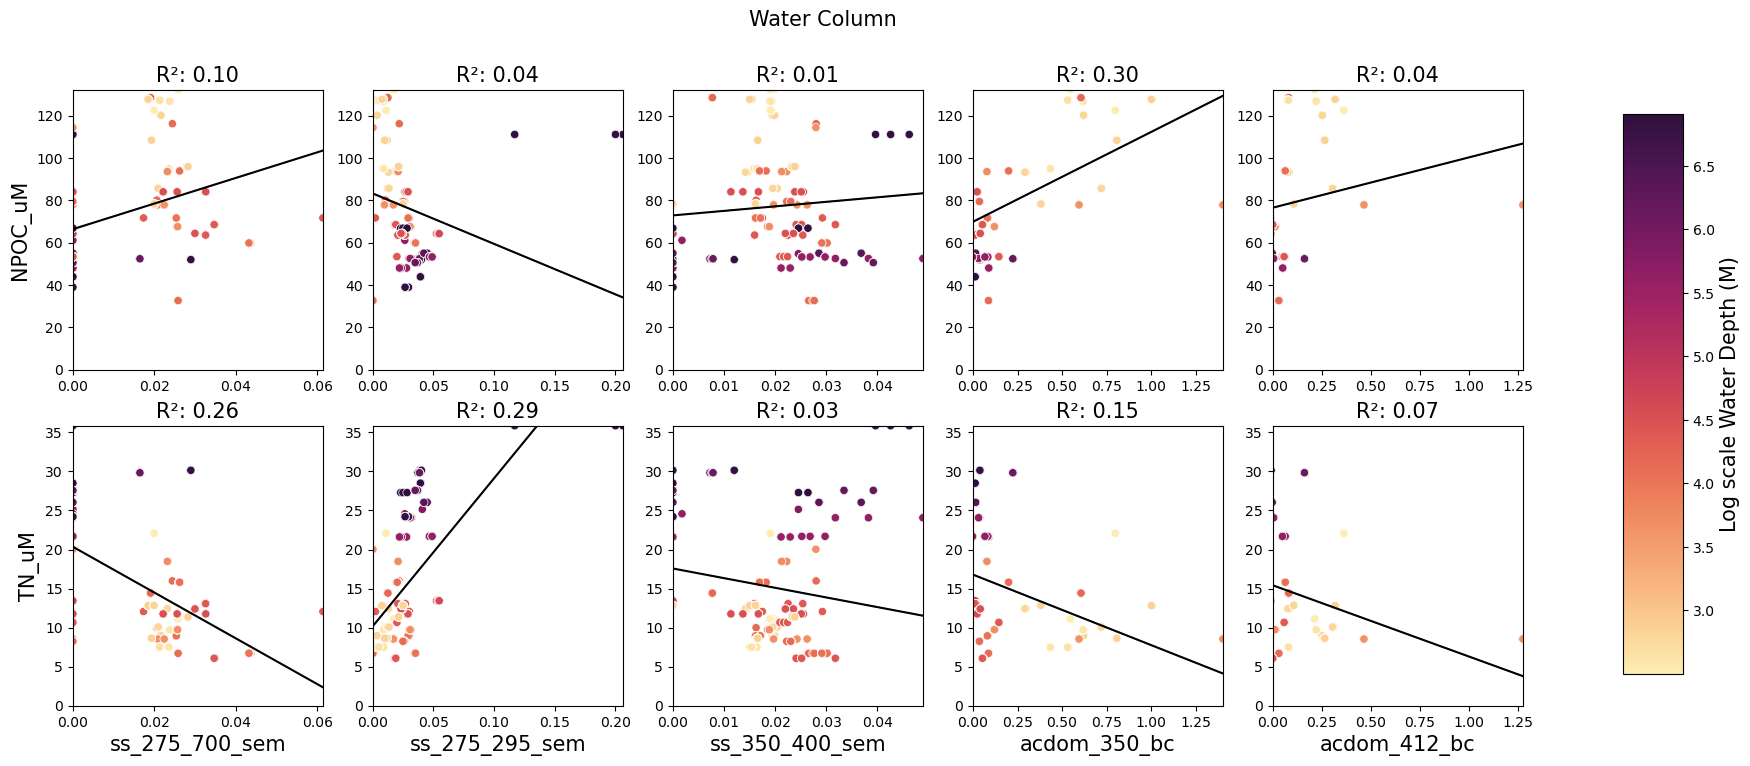

In [32]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Set up the color bar limits
vmin = np.log(df_wc['Water_depth'].min())
vmax = np.log(df_wc['Water_depth'].max())

# Loop through the subplots
for i, x_var in enumerate(['ss_275_700_sem', 'ss_275_295_sem', 'ss_350_400_sem', 'acdom_350_bc', 'acdom_412_bc']):
    for j, y_var in enumerate(['NPOC_uM', 'TN_uM']):
        # Prepare the data for the subplot
        data = data_wc_bbl[[x_var, y_var, 'Water_depth']]
        data.dropna(inplace=True)
        X = data[[x_var]]
        y = data[y_var]
        colors = np.log(data['Water_depth'].astype(float))

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.matter, vmin=vmin, vmax=vmax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('TN_uM', 'dissolved N (\u03BCM)'), size=15)
        else: 
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('a412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)').replace('a350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'), size = 15)
        else: 
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
        ax.set_ylim([0, data[y_var].max()])
        ax.set_xlim([0, data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.matter, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('Log scale Water Depth (M)', size = 15)
        
# Adjust the layout of the subplots
fig.suptitle('Water bottom', size = 15)
fig.set_facecolor('w')
#plt.tight_layout()

#plt.savefig("../Dissertation_projects/Figures/Corrolation_plots/WC_CDOM.png")

plt.show()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9452\3013547439.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9452\3013547439.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9452\3013547439.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData

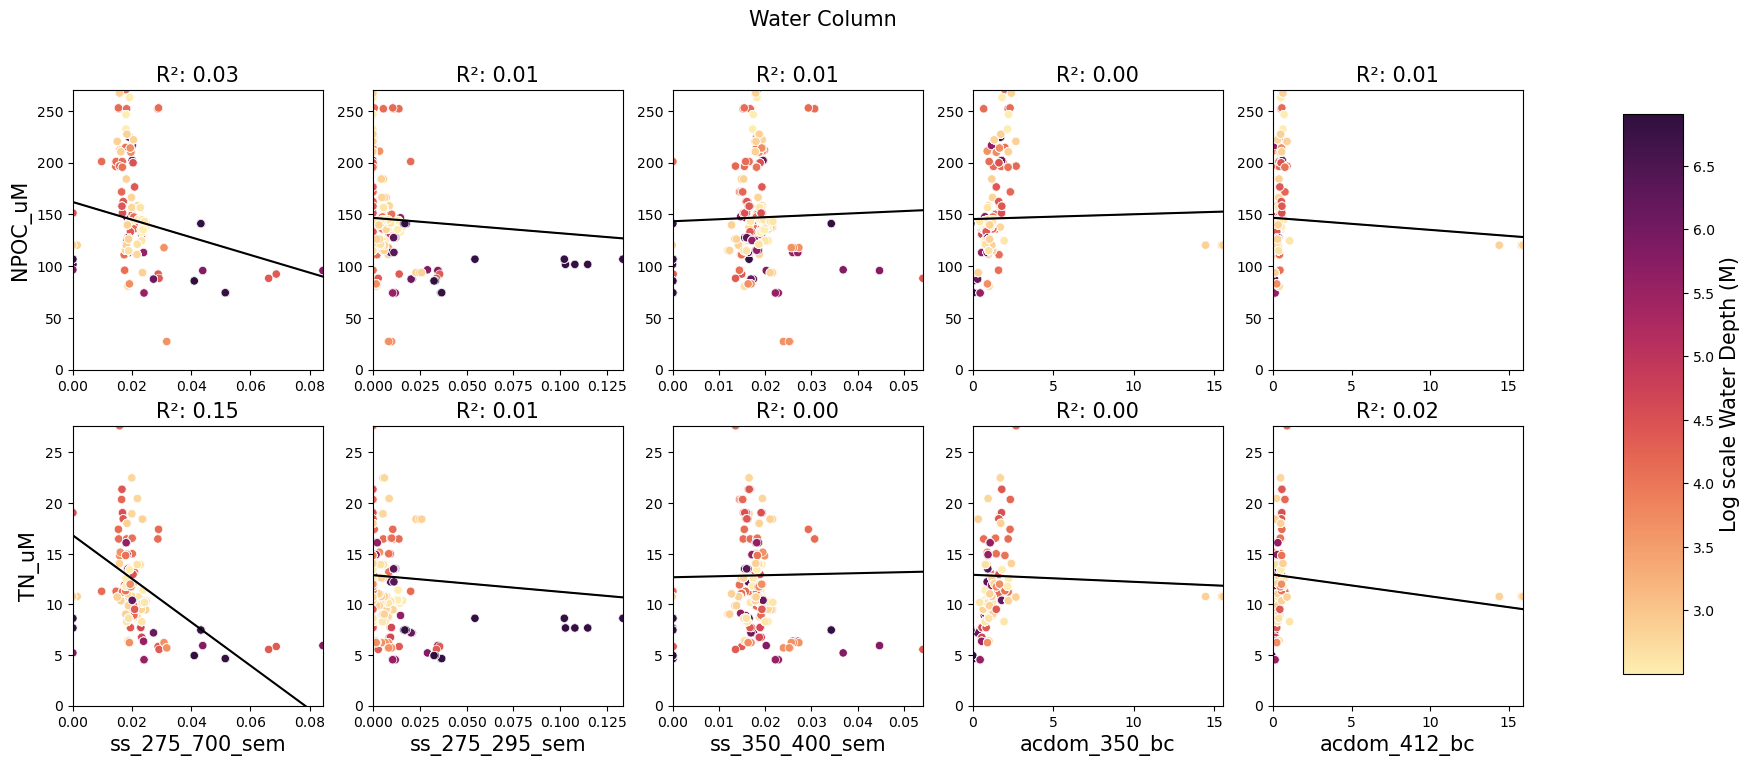

In [33]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Set up the color bar limits
vmin = np.log(df_wc['Water_depth'].min())
vmax = np.log(df_wc['Water_depth'].max())

# Loop through the subplots
for i, x_var in enumerate(['ss_275_700_sem', 'ss_275_295_sem', 'ss_350_400_sem', 'acdom_350_bc', 'acdom_412_bc']):
    for j, y_var in enumerate(['NPOC_uM', 'TN_uM']):
        # Prepare the data for the subplot
        data = data_wc_surf[[x_var, y_var, 'Water_depth']]
        data.dropna(inplace=True)
        X = data[[x_var]]
        y = data[y_var]
        colors = np.log(data['Water_depth'].astype(float))

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.matter, vmin=vmin, vmax=vmax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('TN_uM', 'dissolved N (\u03BCM)'), size=15)
        else: 
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('a412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)').replace('a350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'), size = 15)
        else: 
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
        ax.set_ylim([0, data[y_var].max()])
        ax.set_xlim([0, data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.matter, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('Log scale Water Depth (M)', size = 15)
        
# Adjust the layout of the subplots
fig.suptitle('Water Surf', size = 15)
fig.set_facecolor('w')
#plt.tight_layout()

#plt.savefig("../Dissertation_projects/Figures/Corrolation_plots/WC_CDOM.png")

plt.show()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9452\1200801856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9452\1200801856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9452\1200801856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData

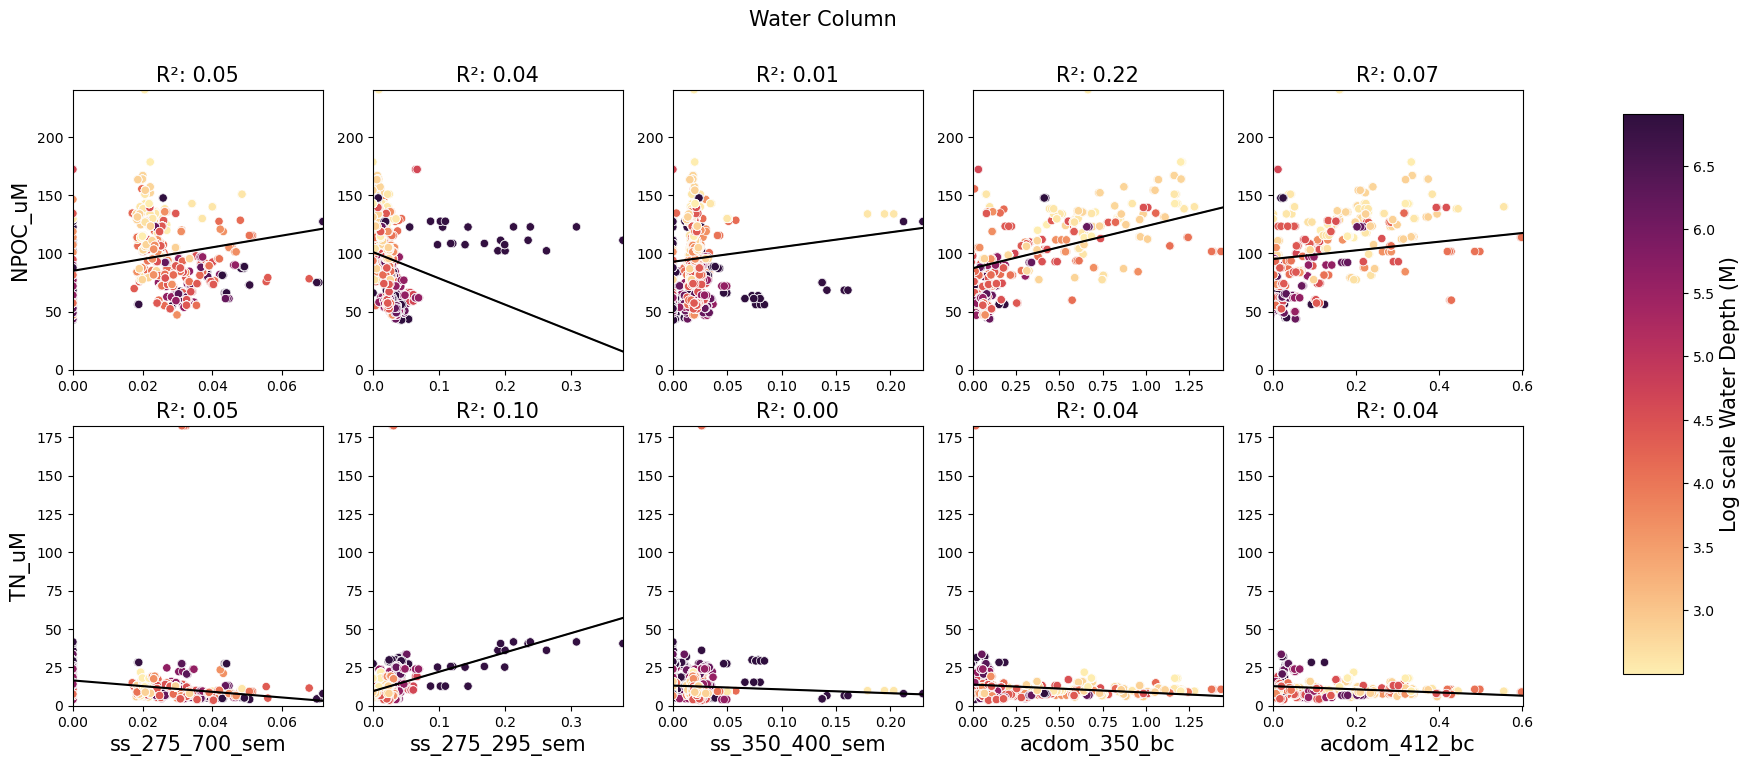

In [34]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Set up the color bar limits
vmin = np.log(df_wc['Water_depth'].min())
vmax = np.log(df_wc['Water_depth'].max())

# Loop through the subplots
for i, x_var in enumerate(['ss_275_700_sem', 'ss_275_295_sem', 'ss_350_400_sem', 'acdom_350_bc', 'acdom_412_bc']):
    for j, y_var in enumerate(['NPOC_uM', 'TN_uM']):
        # Prepare the data for the subplot
        data = data_wc[[x_var, y_var, 'Water_depth']]
        data.dropna(inplace=True)
        X = data[[x_var]]
        y = data[y_var]
        colors = np.log(data['Water_depth'].astype(float))

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.matter, vmin=vmin, vmax=vmax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('TN_uM', 'dissolved N (\u03BCM)'), size=15)
        else: 
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('a412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)').replace('a350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'), size = 15)
        else: 
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
        ax.set_ylim([0, data[y_var].max()])
        ax.set_xlim([0, data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.matter, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('Log scale Water Depth (M)', size = 15)
        
# Adjust the layout of the subplots
fig.suptitle('Water Column', size = 15)
fig.set_facecolor('w')
#plt.tight_layout()

#plt.savefig("../Dissertation_projects/Figures/Corrolation_plots/WC_CDOM.png")

plt.show()

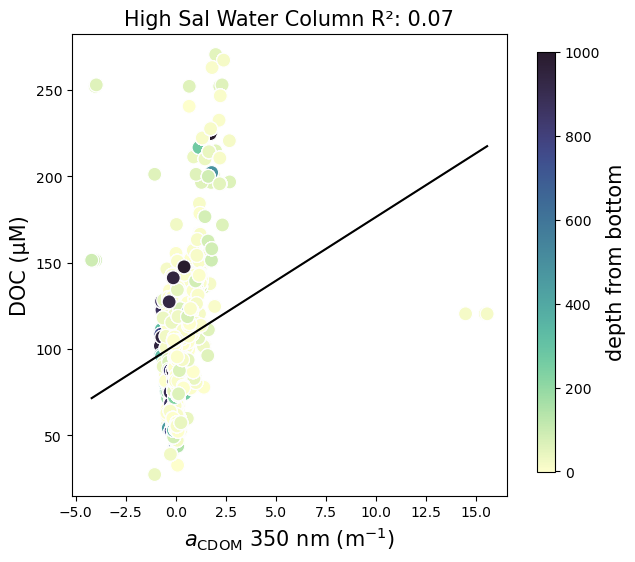

In [35]:
def xyplotcolor(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    colors = data[z_var].astype(float)

    vmin = data[z_var].min()
    vmax = data[z_var].max()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=z_var_color, s=100, data=data, ax=axes, legend=False , vmin=vmin, vmax=vmax)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

    axes.set_xlabel(x_var.replace(x_var, x_var_lab), size=15)
    axes.set_ylabel(y_var.replace(y_var, y_var_lab), size=15)

    axes.set_title(titel + f'R\u00B2: {score:.2f}', size = 15)

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=z_var_color, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel(z_var_lab, size=15)

    # Show the plot
    #plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()


x_var = 'acdom_350_bc'
y_var = 'NPOC_uM'

x_var_lab = r'$a_{\mathrm{CDOM}}$ 350 nm (m$^{-1}$)'
y_var_lab = 'DOC (µM)'

z_var = 'Depth_bott'
z_var_lab = 'depth from bottom'
z_var_color = cmo.deep


titel = " Water Column "
xyplotcolor(df_wc)

C:\Users\hmlbr\anaconda3\envs\bugs\Lib\site-packages\seaborn\relational.py:438: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\hmlbr\anaconda3\envs\bugs\Lib\site-packages\seaborn\relational.py:438: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\hmlbr\anaconda3\envs\bugs\Lib\site-packages\seaborn\relational.py:438: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\hmlbr\anaconda3\envs\bugs\Lib\site-packages\seaborn\rel

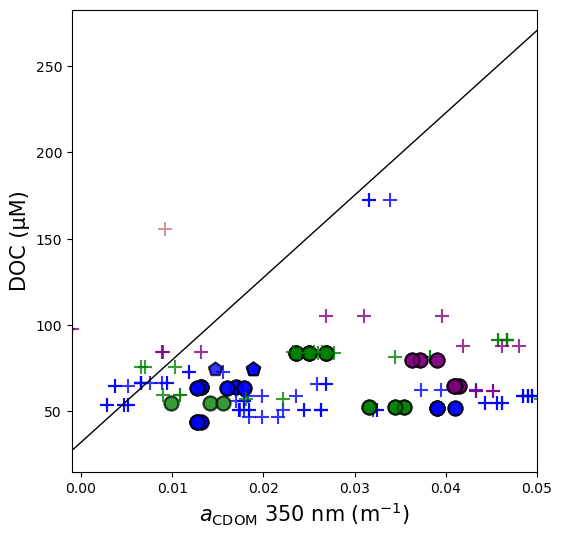

C:\Users\hmlbr\anaconda3\envs\bugs\Lib\site-packages\seaborn\relational.py:438: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\hmlbr\anaconda3\envs\bugs\Lib\site-packages\seaborn\relational.py:438: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\hmlbr\anaconda3\envs\bugs\Lib\site-packages\seaborn\relational.py:438: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\hmlbr\anaconda3\envs\bugs\Lib\site-packages\seaborn\rel

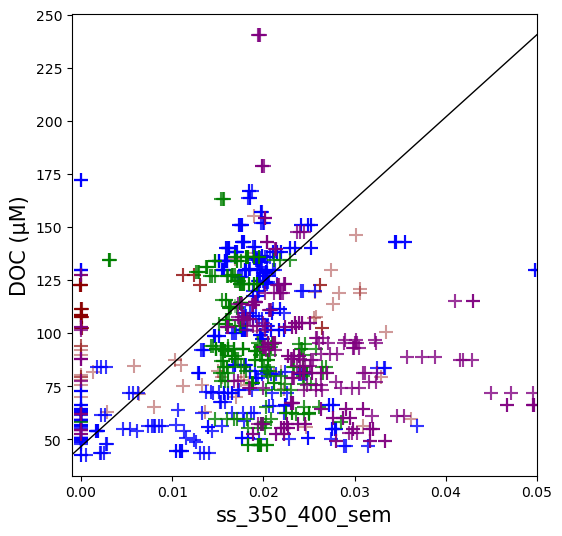

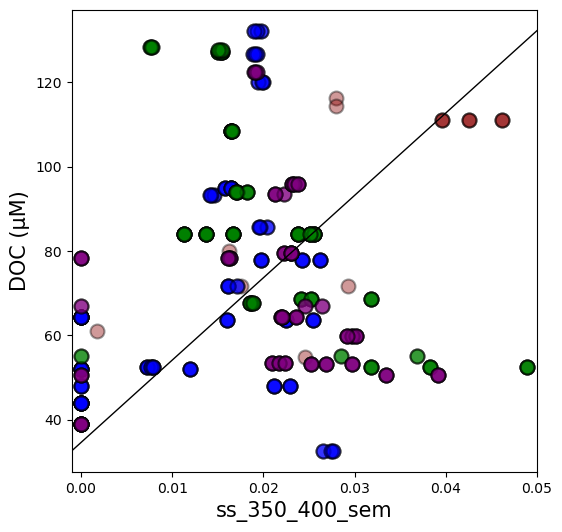

In [45]:
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

marker_map = {
    'Surface': 'p',
    'BBL': 'o',
    'water_col': '+',
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

def xyplotcolor_cat_color(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'group']]
    subcat = data['Trip'].tolist()
    subrgn = data['group'].tolist()
    
    for campaign in data[z_var].unique():
        for region in data['group'].unique():
            subset = data[(data[z_var] == campaign) & (data['group'] == region)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(region, 'o'), 
                color=color_map.get(campaign, 'grey'), 
                label=f"{label_map.get(campaign, campaign)} ({region})",
                s=100, 
                edgecolor='black', 
                linewidth=1.5, alpha = 0.4, 
                ax=axes, 
                legend=False
            )
    
    axes.set_xlabel(x_var_lab, size=15)
    axes.set_ylabel(y_var_lab, size=15)

    axes.axline((-.0010, data[y_var].min()), (.05, data[y_var].max()), linewidth=1, color='black')


    #axes.set_ylim(40, 180)
    axes.set_xlim(-.0010, .05)

    axes.set_title(titel, size=15)
    
    #plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

    
x_var = 'acdom_350_bc'
y_var = 'NPOC_uM'

x_var_lab = r'$a_{\mathrm{CDOM}}$ 350 nm (m$^{-1}$)'
y_var_lab = 'DOC (µM)'

z_var = 'Trip'
#z_var_lab = 'Campaign'
#z_var_color = cmo.thermal

#titel = "Water Column "
#save_name = 'sal_temp_doc_wc'
#xyplotcolor_cat_color(data_wc)

titel = ""
save_name = 'model_outputs'
xyplotcolor_cat_color(df_wc)


x_var = 'ss_350_400_sem'
y_var = 'NPOC_uM'

x_var_lab = r'ss_350_400_sem'
y_var_lab = 'DOC (µM)'

z_var = 'Trip'
#z_var_lab = 'Campaign'
#z_var_color = cmo.thermal

#titel = "Water Column "
#save_name = 'sal_temp_doc_wc'
#xyplotcolor_cat_color(data_wc)


titel = ""
save_name = 'model_outputs'
xyplotcolor_cat_color(data_wc)

titel = ""
save_name = 'model_outputs'
xyplotcolor_cat_color(data_wc_bbl)



In [ ]:
#shape by depth group
#make mid waters transparent 
# color by rgn ? 

df_wc_all['group'].unique()